# Capstone Project - The Battle of Neighborhoods
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

### Introduction: Business Problem<a name="introduction"></a>
## Suitable New Store Location in London for an Indian Fashion Retailer
##### The Task at Hand
A company is looking to open a clothing store based on Indian culture in London.<br>
I’ve have been given a task of identifying the best location the open the store where the Asian population is maximum since most of the customers will be Indians, Pakistanis and Bangladeshis.
##### Criteria
Qualitative data from another retailer that they know, suggests that the best locations to open new fashion retail stores may not only be where other clothing is located but that the best places are in fact areas that are near Indian Restaurants, Cafés and Parks. As Asians are very social people that frequent these places often, so opening new stores in these locations is becoming popular.<br><br> 
The analysis and recommendations for new store locations will focus on general neighbourhoods with these establishments, not on specific store addresses. Narrowing down the best district options derived from analysis allows for either further research to be conducted, advising agents of the chosen district, or on the ground searching for specific sites by the company's personnel.
##### Why Data?
Without leveraging data to make decisions about new store locations, the company could spend countless hours walking around neighbourhoods, consulting many real estate agents with their own district biases, and end up opening in yet another location that is not ideal.
Data will provide better answers and better solutions to their task at hand.
##### Outcomes
The goal is to identify the best neighbourhood to open new stores as part of the company's plan. The results will be translated to management in a simple form that will convey the data-driven analysis for the best locations to open stores.


### Data Section <a name="data"></a><br>
London is one of the most ethnically diverse cities in the world. At the 2011 census, London had a population of 8,173,941. Of this number, 44.9% were White British. 37% of the population were born outside the UK, including 24.5% born outside of Europe.<br> <br>
The demography of London is analysed by the Office for National Statistic and data is produced for each of the Greater London wards, the City of London and the 32 London boroughs, the Inner London and Outer London statistical sub-regions, each of the Parliamentary constituencies in London, and for all of Greater London as a whole.<br><br>
For our fashion store problem, we will focus on the Boroughs of London and work on getting the data from all the Boroughs. There are 32 London Boroughs with a population of around 150,000 to 300,000.<br><br>
To solve our problem of finding a best location to open an Indian fashion store in London, we need to datasets based on various parameters such as :
1.	List of **areas of London** available at: https://en.wikipedia.org/wiki/List_of_areas_of_London<br>
2.	The latitudes and longitudes of those areas which the done with the help of **geopy.geocoders** library in python<br>
3.	Population of target audience in all the **boroughs of London** based on their **ethnicity** at **London Datastore**, which is a free and open data-sharing portal where anyone can access data relating to the city. The data is available in XLS and CSV format, which we can download and can use as-is for solving our problem. https://data.london.gov.uk/dataset/ethnic-groups-borough<br><br>
The cleansed data will then be used alongside **Foursquare** data, which is readily available. Foursquare location data will be leveraged to explore or compare **neighbourhoods around London**.

### Methodology<a name="methodology"></a>
1.	Get the population in borough based on ethnicity<br>
2.	Clean the dataset and find the borough with the highest population of Asians.<br>
3.	Select the borough with highest population of Asian as preferred location for the store<br>
4.	Get the list of all the boroughs with their latitudes and longitudes<br>
5.	Plot all the neighbourhoods on a map<br>
6.	Get all the neighbourhoods of the selected borough with their latitudes and longitudes<br>
7.	Visualize the neighbourhood of the borough<br>
8.	Explore the all the neighbourhood with FourSquare API<br>
9.	Analyse each neighbourhood of selected borough<br>
10.	Display the top ten venues of each neighbourhood<br>
11.	Compare each neighbourhood venues for café, Indian restaurant and parks<br>
12.	Displaying selected neighbourhoods of borough on map <br>

#### importing required libararies

In [160]:
# Import libraries
import numpy as np # library to handle data in a vectorized manner
import json # library to handle JSON files
import pandas as pd

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from bs4 import BeautifulSoup
import requests

# Import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


## 1. Get the population in borough based on ethnicity

#### downloading the enthnic gropus by borough dataset 

In [132]:
!wget -O ethnic-groups-by-borough.xls https://data.london.gov.uk/dataset/ethnic-groups-borough

--2020-06-19 19:04:29--  https://data.london.gov.uk/dataset/ethnic-groups-borough
Resolving data.london.gov.uk (data.london.gov.uk)... 99.86.109.72, 99.86.109.39, 99.86.109.57, ...
Connecting to data.london.gov.uk (data.london.gov.uk)|99.86.109.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘ethnic-groups-by-borough.xls’

    [ <=>                                   ] 138,203     --.-K/s   in 0.03s   

2020-06-19 19:04:29 (3.97 MB/s) - ‘ethnic-groups-by-borough.xls’ saved [138203]



#### Acessing the data set via watson studio

In [109]:
# The code was removed by Watson Studio for sharing.

#### getting data into pandas dataframe 

In [110]:
df= pd.read_excel(streaming_body_3, sheet_name='2018',header=1)

In [111]:
df.head()

,Unnamed: 0,Unnamed: 1,White,Asian,Black,Mixed/ Other,Total,Unnamed: 7,White.1,Asian.1,Black.1,Mixed/ Other.1,Total.1
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E09000001,City of London,-,-,-,-,9000.0,NaN,-,-,-,-,6000.0
2,E09000002,Barking and Dagenham,109000,54000,36000,15000,215000.0,NaN,11000,8000,6000,4000,15000.0
3,E09000003,Barnet,250000,57000,30000,54000,390000.0,NaN,22000,10000,7000,10000,27000.0
4,E09000004,Bexley,195000,17000,21000,15000,248000.0,NaN,15000,5000,5000,4000,17000.0


### 2.	Clean the dataset and find the borough with the highest population of Asians.

#### renaming columns

In [112]:
df.rename(columns={"Unnamed: 0":"code","Unnamed: 1":"area"},inplace= True)
df.head()

,code,area,White,Asian,Black,Mixed/ Other,Total,Unnamed: 7,White.1,Asian.1,Black.1,Mixed/ Other.1,Total.1
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E09000001,City of London,-,-,-,-,9000.0,NaN,-,-,-,-,6000.0
2,E09000002,Barking and Dagenham,109000,54000,36000,15000,215000.0,NaN,11000,8000,6000,4000,15000.0
3,E09000003,Barnet,250000,57000,30000,54000,390000.0,NaN,22000,10000,7000,10000,27000.0
4,E09000004,Bexley,195000,17000,21000,15000,248000.0,NaN,15000,5000,5000,4000,17000.0


##### droping first to rows as they ar not important

In [113]:
df.drop(index=[0,1],inplace = True)
df.head()

,code,area,White,Asian,Black,Mixed/ Other,Total,Unnamed: 7,White.1,Asian.1,Black.1,Mixed/ Other.1,Total.1
2,E09000002,Barking and Dagenham,109000,54000,36000,15000,215000.0,NaN,11000,8000,6000,4000,15000.0
3,E09000003,Barnet,250000,57000,30000,54000,390000.0,NaN,22000,10000,7000,10000,27000.0
4,E09000004,Bexley,195000,17000,21000,15000,248000.0,NaN,15000,5000,5000,4000,17000.0
5,E09000005,Brent,102000,107000,62000,56000,328000.0,NaN,13000,13000,10000,9000,23000.0
6,E09000006,Bromley,267000,15000,21000,28000,330000.0,NaN,21000,5000,6000,7000,24000.0


##### droping the empty column

In [114]:
df.drop(columns="Unnamed: 7", axis=1,inplace = True)
df.head()

,code,area,White,Asian,Black,Mixed/ Other,Total,White.1,Asian.1,Black.1,Mixed/ Other.1,Total.1
2,E09000002,Barking and Dagenham,109000,54000,36000,15000,215000.0,11000,8000,6000,4000,15000.0
3,E09000003,Barnet,250000,57000,30000,54000,390000.0,22000,10000,7000,10000,27000.0
4,E09000004,Bexley,195000,17000,21000,15000,248000.0,15000,5000,5000,4000,17000.0
5,E09000005,Brent,102000,107000,62000,56000,328000.0,13000,13000,10000,9000,23000.0
6,E09000006,Bromley,267000,15000,21000,28000,330000.0,21000,5000,6000,7000,24000.0


#### droping rows that have NaN Data

In [115]:
df.dropna()
df.head()

,code,area,White,Asian,Black,Mixed/ Other,Total,White.1,Asian.1,Black.1,Mixed/ Other.1,Total.1
2,E09000002,Barking and Dagenham,109000,54000,36000,15000,215000.0,11000,8000,6000,4000,15000.0
3,E09000003,Barnet,250000,57000,30000,54000,390000.0,22000,10000,7000,10000,27000.0
4,E09000004,Bexley,195000,17000,21000,15000,248000.0,15000,5000,5000,4000,17000.0
5,E09000005,Brent,102000,107000,62000,56000,328000.0,13000,13000,10000,9000,23000.0
6,E09000006,Bromley,267000,15000,21000,28000,330000.0,21000,5000,6000,7000,24000.0


### droping rows after 33rd index as they contain data of places outside london which is not required

In [116]:
df.drop(df.index[33:],inplace=True)

In [118]:
df.dropna(inplace= True)
df.reset_index(inplace= True, drop= True)
df.head()

,code,area,White,Asian,Black,Mixed/ Other,Total,White.1,Asian.1,Black.1,Mixed/ Other.1,Total.1
0,E09000002,Barking and Dagenham,109000,54000,36000,15000,215000.0,11000,8000,6000,4000,15000.0
1,E09000003,Barnet,250000,57000,30000,54000,390000.0,22000,10000,7000,10000,27000.0
2,E09000004,Bexley,195000,17000,21000,15000,248000.0,15000,5000,5000,4000,17000.0
3,E09000005,Brent,102000,107000,62000,56000,328000.0,13000,13000,10000,9000,23000.0
4,E09000006,Bromley,267000,15000,21000,28000,330000.0,21000,5000,6000,7000,24000.0


#### getting a data frame with boroughs that only contain information of asian population

In [120]:
df_asian=df[['code','area','Asian']]
df_asian.head()

,code,area,Asian
0,E09000002,Barking and Dagenham,54000
1,E09000003,Barnet,57000
2,E09000004,Bexley,17000
3,E09000005,Brent,107000
4,E09000006,Bromley,15000


### 3.	Select the borough with highest population of Asian as preferred location for the store
#### Sorting them in descending order 

In [129]:
df_asian.sort_values(by=['Asian'],ascending=False,inplace=True)
df_asian.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,code,area,Asian
23,E09000025,Newham,166000
28,E09000030,Tower Hamlets,128000
24,E09000026,Redbridge,126000
3,E09000005,Brent,107000
15,E09000017,Hillingdon,100000


## As the Newham borough is having highest asian population, we will consider this borough as our preferred location for our Indian Fashion store.

## 4.	Get the list of all the boroughs with their latitudes and longitudes

#### Read the latitude and longitude coordinates of all Boroughs in London from a Wikipedia link

In [7]:
URL = "https://en.wikipedia.org/wiki/List_of_London_boroughs"
res = requests.get(URL).text
soup = BeautifulSoup(res,'lxml')

df_list = []
# print(soup)
for items in soup.find('table', class_= 'wikitable sortable').find_all('tr')[1::]:
    data = items.find_all(['td'])
    data1 = data[0]
    data8 = data[8]    
    try:
        borough_name = data1.get_text()
        borough_name = borough_name.split('[')
        borough_name = borough_name[0]
        borough_name = borough_name.strip()
        
        ll = data8.get_text()
        ll = ll.split('/')
        lat_long = ll[2]
        lat_long = lat_long.split('(')
        lat_long = lat_long[0]
        lat_long = lat_long.split(';')
        latitude = lat_long[0]
        latitude = latitude.strip()
        longitude = lat_long[1]
        longitude = longitude.strip()
        longitude = longitude.replace(u'\ufeff', '')
        latitude = float(latitude)
        longitude = float(longitude)

#  Append the borough name, latitude and logitude in a list
        df_list.append((borough_name, latitude, longitude))
    except IndexError:pass

In [10]:
df_boroughs = pd.DataFrame(df_list, columns=['Borough', 'Latitude' , 'Longitude'])
print(df_boroughs.shape)
df_boroughs.head()

(32, 3)


,Borough,Latitude,Longitude
0,Barking and Dagenham,51.5607,0.1557
1,Barnet,51.6252,-0.1517
2,Bexley,51.4549,0.1505
3,Brent,51.5588,-0.2817
4,Bromley,51.4039,0.0198


In [12]:
print(df_boroughs.dtypes)
df_boroughs.loc[df_boroughs['Borough'] == 'Newham']

Borough       object
Latitude     float64
Longitude    float64
dtype: object


,Borough,Latitude,Longitude
23,Newham,51.5077,0.0469


#### Get the Latitude and Longitude of London City using geopy library

In [14]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
address = 'London, UK'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London City are {}, {}.'.format(latitude, longitude))

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  app.launch_new_instance()


The geograpical coordinate of London City are 51.5073219, -0.1276474.


### 5.	Plot all the neighbourhoods on a map
#### Create a map of London with Boroughs superimposed on top.

In [41]:
#import folium 

# create map of London using latitude and longitude values
map_london = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough in zip(df_boroughs['Latitude'], df_boroughs['Longitude'], df_boroughs['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
fill_opacity=0.7).add_to(map_london)  
map_london

### Preferred location for Indian Fahsion Store - Newham Borough
##### As the borough Newham is having high asian population, we will consider  only the neighbourhoods of this borough. For that we have to get the latitude and longitude details of all the areas(neighbourhoods) of Newham borough.
### 6.	Get all the neighbourhoods of the selected borough with their latitudes and longitudes
#### Read the latitude and longitude coordinates of all the neighborhoods(areas) in Newham Borough

In [20]:
from urllib.request import urlopen
import re
URL = "https://en.wikipedia.org/wiki/List_of_areas_of_London"
res = requests.get(URL).text
soup = BeautifulSoup(res,'lxml')

codes = []
areas_list = []
href_links_list = []
for items in soup.find('table', class_= 'wikitable sortable').find_all('tr')[1::]:
    data = items.find_all(['td'])
    data0 = data[0]
    area_name = data0.text

    data1 = data[1]
    data1 = data1.text
    borough = data1.split('[')
    borough_name = borough[0]
    data5 = data[5]
    code = data5.text
    code = code.strip()
    
    if borough_name == 'Newham':
        codes.append(code)
        areas_list.append((borough_name,area_name,code))

                
for link in soup.findAll('a', attrs={'href': re.compile("^https://tools.wmflabs.org")}):
            htext = link.text
            if htext in codes:
                hlink = link.get('href')
                href_links_list.append((htext, hlink))

### Create a DataFrame from the Areas list

In [21]:
df_areas = pd.DataFrame(areas_list, columns=['Borough', 'Area', 'Code'])
df_areas.head()

,Borough,Area,Code
0,Newham,Beckton,TQ435815
1,Newham,Canning Town,TQ405815
2,Newham,Custom House,TQ408807
3,Newham,East Ham,TQ425835
4,Newham,Forest Gate,TQ405855


In [23]:
print(df_areas.columns)
print(df_areas.shape)

Index(['Borough', 'Area', 'Code'], dtype='object')
(14, 3)


### Create a DataFrame from the list of href links

In [24]:
df_links = pd.DataFrame(href_links_list, columns=['Code','href'])
print(df_links.columns)
print(df_links.shape)
df_links.head()

Index(['Code', 'href'], dtype='object')
(15, 2)


,Code,href
0,TQ435815,https://tools.wmflabs.org/geohack/en/51.514205...
1,TQ405815,https://tools.wmflabs.org/geohack/en/51.514959...
2,TQ408807,https://tools.wmflabs.org/geohack/en/51.507695...
3,TQ425835,https://tools.wmflabs.org/geohack/en/51.532429...
4,TQ405855,https://tools.wmflabs.org/geohack/en/51.550902...


#### Merge the Areas and href Links DataFrames

In [25]:
cols = df_links.columns.difference(df_areas.columns)
cols

Index(['href'], dtype='object')

In [28]:
df_areas_links = pd.concat([df_areas, df_links[cols]], axis=1)
print(df_areas_links.shape)
df_areas_links

(15, 4)


,Borough,Area,Code,href
0,Newham,Beckton,TQ435815,https://tools.wmflabs.org/geohack/en/51.514205...
1,Newham,Canning Town,TQ405815,https://tools.wmflabs.org/geohack/en/51.514959...
2,Newham,Custom House,TQ408807,https://tools.wmflabs.org/geohack/en/51.507695...
3,Newham,East Ham,TQ425835,https://tools.wmflabs.org/geohack/en/51.532429...
4,Newham,Forest Gate,TQ405855,https://tools.wmflabs.org/geohack/en/51.550902...
5,Newham,Little Ilford,TQ435855,https://tools.wmflabs.org/geohack/en/51.550147...
6,Newham,Manor Park,TQ425855,https://tools.wmflabs.org/geohack/en/51.550401...
7,Newham,Maryland,TQ391849,https://tools.wmflabs.org/geohack/en/51.545857...
8,Newham,North Woolwich,TQ435795,https://tools.wmflabs.org/geohack/en/51.496234...
9,Newham,Plaistow,TQ405825,https://tools.wmflabs.org/geohack/en/51.523944...


#### Remove the row where there is no data

In [29]:
df_areas_links = df_areas_links.dropna(how='any')
df_areas_links

,Borough,Area,Code,href
0,Newham,Beckton,TQ435815,https://tools.wmflabs.org/geohack/en/51.514205...
1,Newham,Canning Town,TQ405815,https://tools.wmflabs.org/geohack/en/51.514959...
2,Newham,Custom House,TQ408807,https://tools.wmflabs.org/geohack/en/51.507695...
3,Newham,East Ham,TQ425835,https://tools.wmflabs.org/geohack/en/51.532429...
4,Newham,Forest Gate,TQ405855,https://tools.wmflabs.org/geohack/en/51.550902...
5,Newham,Little Ilford,TQ435855,https://tools.wmflabs.org/geohack/en/51.550147...
6,Newham,Manor Park,TQ425855,https://tools.wmflabs.org/geohack/en/51.550401...
7,Newham,Maryland,TQ391849,https://tools.wmflabs.org/geohack/en/51.545857...
8,Newham,North Woolwich,TQ435795,https://tools.wmflabs.org/geohack/en/51.496234...
9,Newham,Plaistow,TQ405825,https://tools.wmflabs.org/geohack/en/51.523944...


### Get the geo co-ordinates for all the areas in the Newham borough

In [30]:
geo_codes = []
for row in df_areas_links.itertuples():
    url = row.href
    code = row.Code
    res = requests.get(url).text
    soup1 = BeautifulSoup(res,'lxml')
    
    for lat in soup1.find('span',{'class':'latitude'}):
        latitude = lat
        latitude = float(latitude)
            
    for long in soup1.find('span',{'class':'longitude'}):    
        longitude = long
        longitude = float(longitude)
        
    geo_codes.append((code, latitude, longitude))

print(geo_codes)

[('TQ435815', 51.514206, 0.066634), ('TQ405815', 51.514959, 0.023429), ('TQ408807', 51.507696, 0.027431), ('TQ425835', 51.53243, 0.053041), ('TQ405855', 51.550902, 0.025024), ('TQ435855', 51.550148, 0.068263), ('TQ425855', 51.550401, 0.05385), ('TQ391849', 51.545857, 0.004608), ('TQ435795', 51.496234, 0.065821), ('TQ405825', 51.523945, 0.023828), ('TQ415795', 51.496738, 0.037029), ('TQ385845', 51.54241, -0.004196), ('TQ405837', 51.534728, 0.024306), ('TQ405837', 51.534728, 0.024306)]


#### Create a DataFrame from the above list

In [31]:
df_geo_codes = pd.DataFrame(geo_codes, columns=['Code','Latitude','Longitude'])
df_geo_codes

,Code,Latitude,Longitude
0,TQ435815,51.514206,0.066634
1,TQ405815,51.514959,0.023429
2,TQ408807,51.507696,0.027431
3,TQ425835,51.532430,0.053041
4,TQ405855,51.550902,0.025024
5,TQ435855,51.550148,0.068263
6,TQ425855,51.550401,0.053850
7,TQ391849,51.545857,0.004608
8,TQ435795,51.496234,0.065821
9,TQ405825,51.523945,0.023828


#### Now merge the Neighborhoods and Geocodes DataFrames

In [32]:
print(df_areas.columns)
print(df_areas.shape)
print(df_geo_codes.columns)
print(df_geo_codes.shape)

Index(['Borough', 'Area', 'Code'], dtype='object')
(14, 3)
Index(['Code', 'Latitude', 'Longitude'], dtype='object')
(14, 3)


In [33]:
cols = df_geo_codes.columns.difference(df_areas.columns)
cols

Index(['Latitude', 'Longitude'], dtype='object')

In [34]:
Newham_borough = pd.concat([df_areas, df_geo_codes[cols]], axis=1)
Newham_borough.head()

,Borough,Area,Code,Latitude,Longitude
0,Newham,Beckton,TQ435815,51.514206,0.066634
1,Newham,Canning Town,TQ405815,51.514959,0.023429
2,Newham,Custom House,TQ408807,51.507696,0.027431
3,Newham,East Ham,TQ425835,51.532430,0.053041
4,Newham,Forest Gate,TQ405855,51.550902,0.025024


#### Change the name of the column 'Area' to 'Neighborhood '

In [35]:
Newham_borough = Newham_borough.rename(columns={'Area' :'Neighborhood'})

#### We do not need the column Code for our further analysis, so we will drop it

In [36]:
Newham_borough.drop(['Code'], axis=1, inplace=True)
print(Newham_borough.columns)
Newham_borough.head()

Index(['Borough', 'Neighborhood', 'Latitude', 'Longitude'], dtype='object')


,Borough,Neighborhood,Latitude,Longitude
0,Newham,Beckton,51.514206,0.066634
1,Newham,Canning Town,51.514959,0.023429
2,Newham,Custom House,51.507696,0.027431
3,Newham,East Ham,51.532430,0.053041
4,Newham,Forest Gate,51.550902,0.025024


In [37]:
Newham_borough.dtypes

Borough          object
Neighborhood     object
Latitude        float64
Longitude       float64
dtype: object

#### Now lets get the Coordinates of Newham Borough

In [38]:
address = 'Newham, London'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Newham are {}, {}.'.format(latitude, longitude))

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  app.launch_new_instance()


The geograpical coordinate of Newham are 51.52999955, 0.02931796029382208.


## 7.	Visualize the neighbourhood of the borough

In [40]:
# create map of Newham using latitude and longitude values
map_Newham = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(Newham_borough['Latitude'], Newham_borough['Longitude'], Newham_borough['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_Newham)  
    
map_Newham

## Analysis <a name='analysis'></a>

## 8. Explore the all the neighbourhood with FourSquare API

#### Define FourSquare Credentials

In [162]:
# The code was removed by Watson Studio for sharing.

In [45]:
LIMIT=100

In [46]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, CLIENT_SECRET, 
            VERSION, lat, lng, radius, LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, lat, lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 
                             'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
    
    return(nearby_venues)


#### Now write the code to run the above function on each neighborhood and create a new dataframe called Newham venues

In [47]:
Newham_venues = getNearbyVenues(names=Newham_borough['Neighborhood'],
                                   latitudes=Newham_borough['Latitude'],
                                   longitudes=Newham_borough['Longitude']
                                  )

In [48]:
print(Newham_venues.shape)

Newham_venues.head()

(225, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Beckton,51.514206,0.066634,East london Gymnastics Club,51.514107,0.060155,Gym / Fitness Center
1,Beckton,51.514206,0.066634,Home Bargains,51.516790,0.062967,Discount Store
2,Beckton,51.514206,0.066634,Lituanica,51.516442,0.062927,Grocery Store
3,Beckton,51.514206,0.066634,Premier Inn London Beckton,51.515115,0.061016,Hotel
4,Beckton,51.514206,0.066634,Matalan,51.516004,0.062635,Clothing Store


#### Let's check how many venues were returned for each neighborhood

In [49]:
Newham_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Beckton,9,9,9,9,9,9
Canning Town,4,4,4,4,4,4
Custom House,31,31,31,31,31,31
East Ham,15,15,15,15,15,15
Forest Gate,10,10,10,10,10,10
Little Ilford,4,4,4,4,4,4
Manor Park,4,4,4,4,4,4
Maryland,26,26,26,26,26,26
North Woolwich,23,23,23,23,23,23


#### Let's find out how many unique categories can be curated from all the returned venues

In [50]:
print('There are {} uniques categories.'.format(len(Newham_venues['Venue Category'].unique())))

There are 102 uniques categories.


## 9.	Analyse each neighbourhood of selected borough
### Analyzing each neighborhood in Newham borough

In [51]:
# one hot encoding
Newham_onehot = pd.get_dummies(Newham_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Newham_onehot['Neighborhood'] = Newham_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Newham_onehot.columns[-1]] + list(Newham_onehot.columns[:-1])
Newham_onehot = Newham_onehot[fixed_columns]

Newham_onehot.head()

,Neighborhood,Accessories Store,African Restaurant,Art Gallery,Bakery,Bar,Boat or Ferry,Bookstore,Boutique,Brewery,...,Tapas Restaurant,Theater,Toy / Game Store,Train Station,Tunnel,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar
0,Beckton,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Beckton,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Beckton,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Beckton,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Beckton,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
Newham_onehot.shape

(225, 103)

#### Let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category


In [59]:
Newham_grouped = Newham_onehot.groupby('Neighborhood').mean().reset_index()
Newham_grouped

,Neighborhood,Accessories Store,African Restaurant,Art Gallery,Bakery,Bar,Boat or Ferry,Bookstore,Boutique,Brewery,...,Tapas Restaurant,Theater,Toy / Game Store,Train Station,Tunnel,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar
0,Beckton,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1,Canning Town,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2,Custom House,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.032258,0.000,0.000000,0.0,0.000000,0.032258,0.000000,0.0,0.000000,0.032258
3,East Ham,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,...,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.066667,0.000000
4,Forest Gate,0.000000,0.0,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000,0.000000,0.1,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
5,Little Ilford,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
6,Manor Park,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
7,Maryland,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.038462,0.0,0.000000,0.000000
8,North Woolwich,0.000000,0.0,0.000000,0.000000,0.000000,0.043478,0.000000,0.000000,0.000000,...,0.000000,0.000,0.000000,0.0,0.043478,0.000000,0.000000,0.0,0.043478,0.000000
9,Plaistow,0.000000,0.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.1,0.000000,0.000000


In [54]:
Newham_grouped.columns

Index(['Neighborhood', 'Accessories Store', 'African Restaurant',
       'Art Gallery', 'Bakery', 'Bar', 'Boat or Ferry', 'Bookstore',
       'Boutique', 'Brewery',
       ...
       'Tapas Restaurant', 'Theater', 'Toy / Game Store', 'Train Station',
       'Tunnel', 'Vegetarian / Vegan Restaurant', 'Video Game Store',
       'Vietnamese Restaurant', 'Warehouse Store', 'Wine Bar'],
      dtype='object', length=103)

### Let's print each neighborhood along with the top 5 most common venues


In [55]:
num_top_venues = 5
for hood in Newham_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Newham_grouped[Newham_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Beckton----
                  venue  freq
0        Discount Store  0.11
1  Gym / Fitness Center  0.11
2                   Pub  0.11
3        Clothing Store  0.11
4        Shopping Plaza  0.11


----Canning Town----
                venue  freq
0                Café  0.50
1                Park  0.25
2   Convenience Store  0.25
3   Accessories Store  0.00
4  Mexican Restaurant  0.00


----Custom House----
                venue  freq
0               Hotel  0.13
1         Coffee Shop  0.06
2  Chinese Restaurant  0.06
3      Sandwich Place  0.06
4                 Pub  0.06


----East Ham----
                  venue  freq
0        Discount Store  0.13
1         Grocery Store  0.07
2  Fast Food Restaurant  0.07
3                  Park  0.07
4                   Pub  0.07


----Forest Gate----
                  venue  freq
0         Grocery Store   0.3
1                Bakery   0.1
2                   Pub   0.1
3  Fast Food Restaurant   0.1
4         Train Station   0.1


----Little Ilford--

##### Let's put that into a pandas dataframe
##### First, let's write a function to sort the venues in descending order.

In [56]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

## 10.	Display the top ten venues of each neighbourhood
#### Now let's create the new dataframe and display the top 10 venues for each neighborhood of Newham.

In [57]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Newham_grouped['Neighborhood']

for ind in np.arange(Newham_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Newham_grouped.iloc[ind, :], num_top_venues)

In [58]:
neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Beckton,Hotel,Shopping Plaza,Grocery Store,Furniture / Home Store,Light Rail Station,Discount Store,Pub,Clothing Store,Gym / Fitness Center,Brewery
1,Canning Town,Café,Park,Convenience Store,Diner,Discount Store,Doner Restaurant,Donut Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store
2,Custom House,Hotel,Chinese Restaurant,Pub,Coffee Shop,Sandwich Place,Burger Joint,Dry Cleaner,English Restaurant,Gym,Restaurant
3,East Ham,Discount Store,Supermarket,Park,Electronics Store,Coffee Shop,Pub,Clothing Store,Sandwich Place,Fast Food Restaurant,Jewelry Store
4,Forest Gate,Grocery Store,Fast Food Restaurant,Bakery,Train Station,Pub,Market,Café,Fish & Chips Shop,Wine Bar,Discount Store
5,Little Ilford,Fried Chicken Joint,Ice Cream Shop,Indian Restaurant,Grocery Store,Food Court,Discount Store,Doner Restaurant,Donut Shop,Dry Cleaner,Eastern European Restaurant
6,Manor Park,Gym / Fitness Center,Indian Restaurant,Restaurant,Gas Station,Wine Bar,Fish & Chips Shop,Discount Store,Doner Restaurant,Donut Shop,Dry Cleaner
7,Maryland,Hotel,Pub,Café,Sculpture Garden,General Entertainment,Furniture / Home Store,Indian Restaurant,Indie Movie Theater,Indie Theater,Eastern European Restaurant
8,North Woolwich,Pier,Hotel,Clothing Store,Plaza,Pub,Italian Restaurant,River,Sandwich Place,Pharmacy,Sculpture Garden
9,Plaistow,Grocery Store,Gym / Fitness Center,Indian Restaurant,Pub,Café,Bus Stop,Park,Vietnamese Restaurant,African Restaurant,Go Kart Track


In [60]:
# The shape of the sorted data is
neighborhoods_venues_sorted.shape

(14, 11)

## 11.Compare each neighbourhood venues for café, Indian restaurant and parks.

### The business types criteria specified by the client! 'café', 'Indian restaurant' and 'parks'
Let's look at their frequency of occurance for all the London neighborhoods, isolating the categorical venues

These are the venue types that the client wants to have an abundant density of in the ideal store locations. I've used a violin plot from the seaborn library - it is a great way to visualise frequency distribution datasets, they display a density estimation of the underlying distribution.

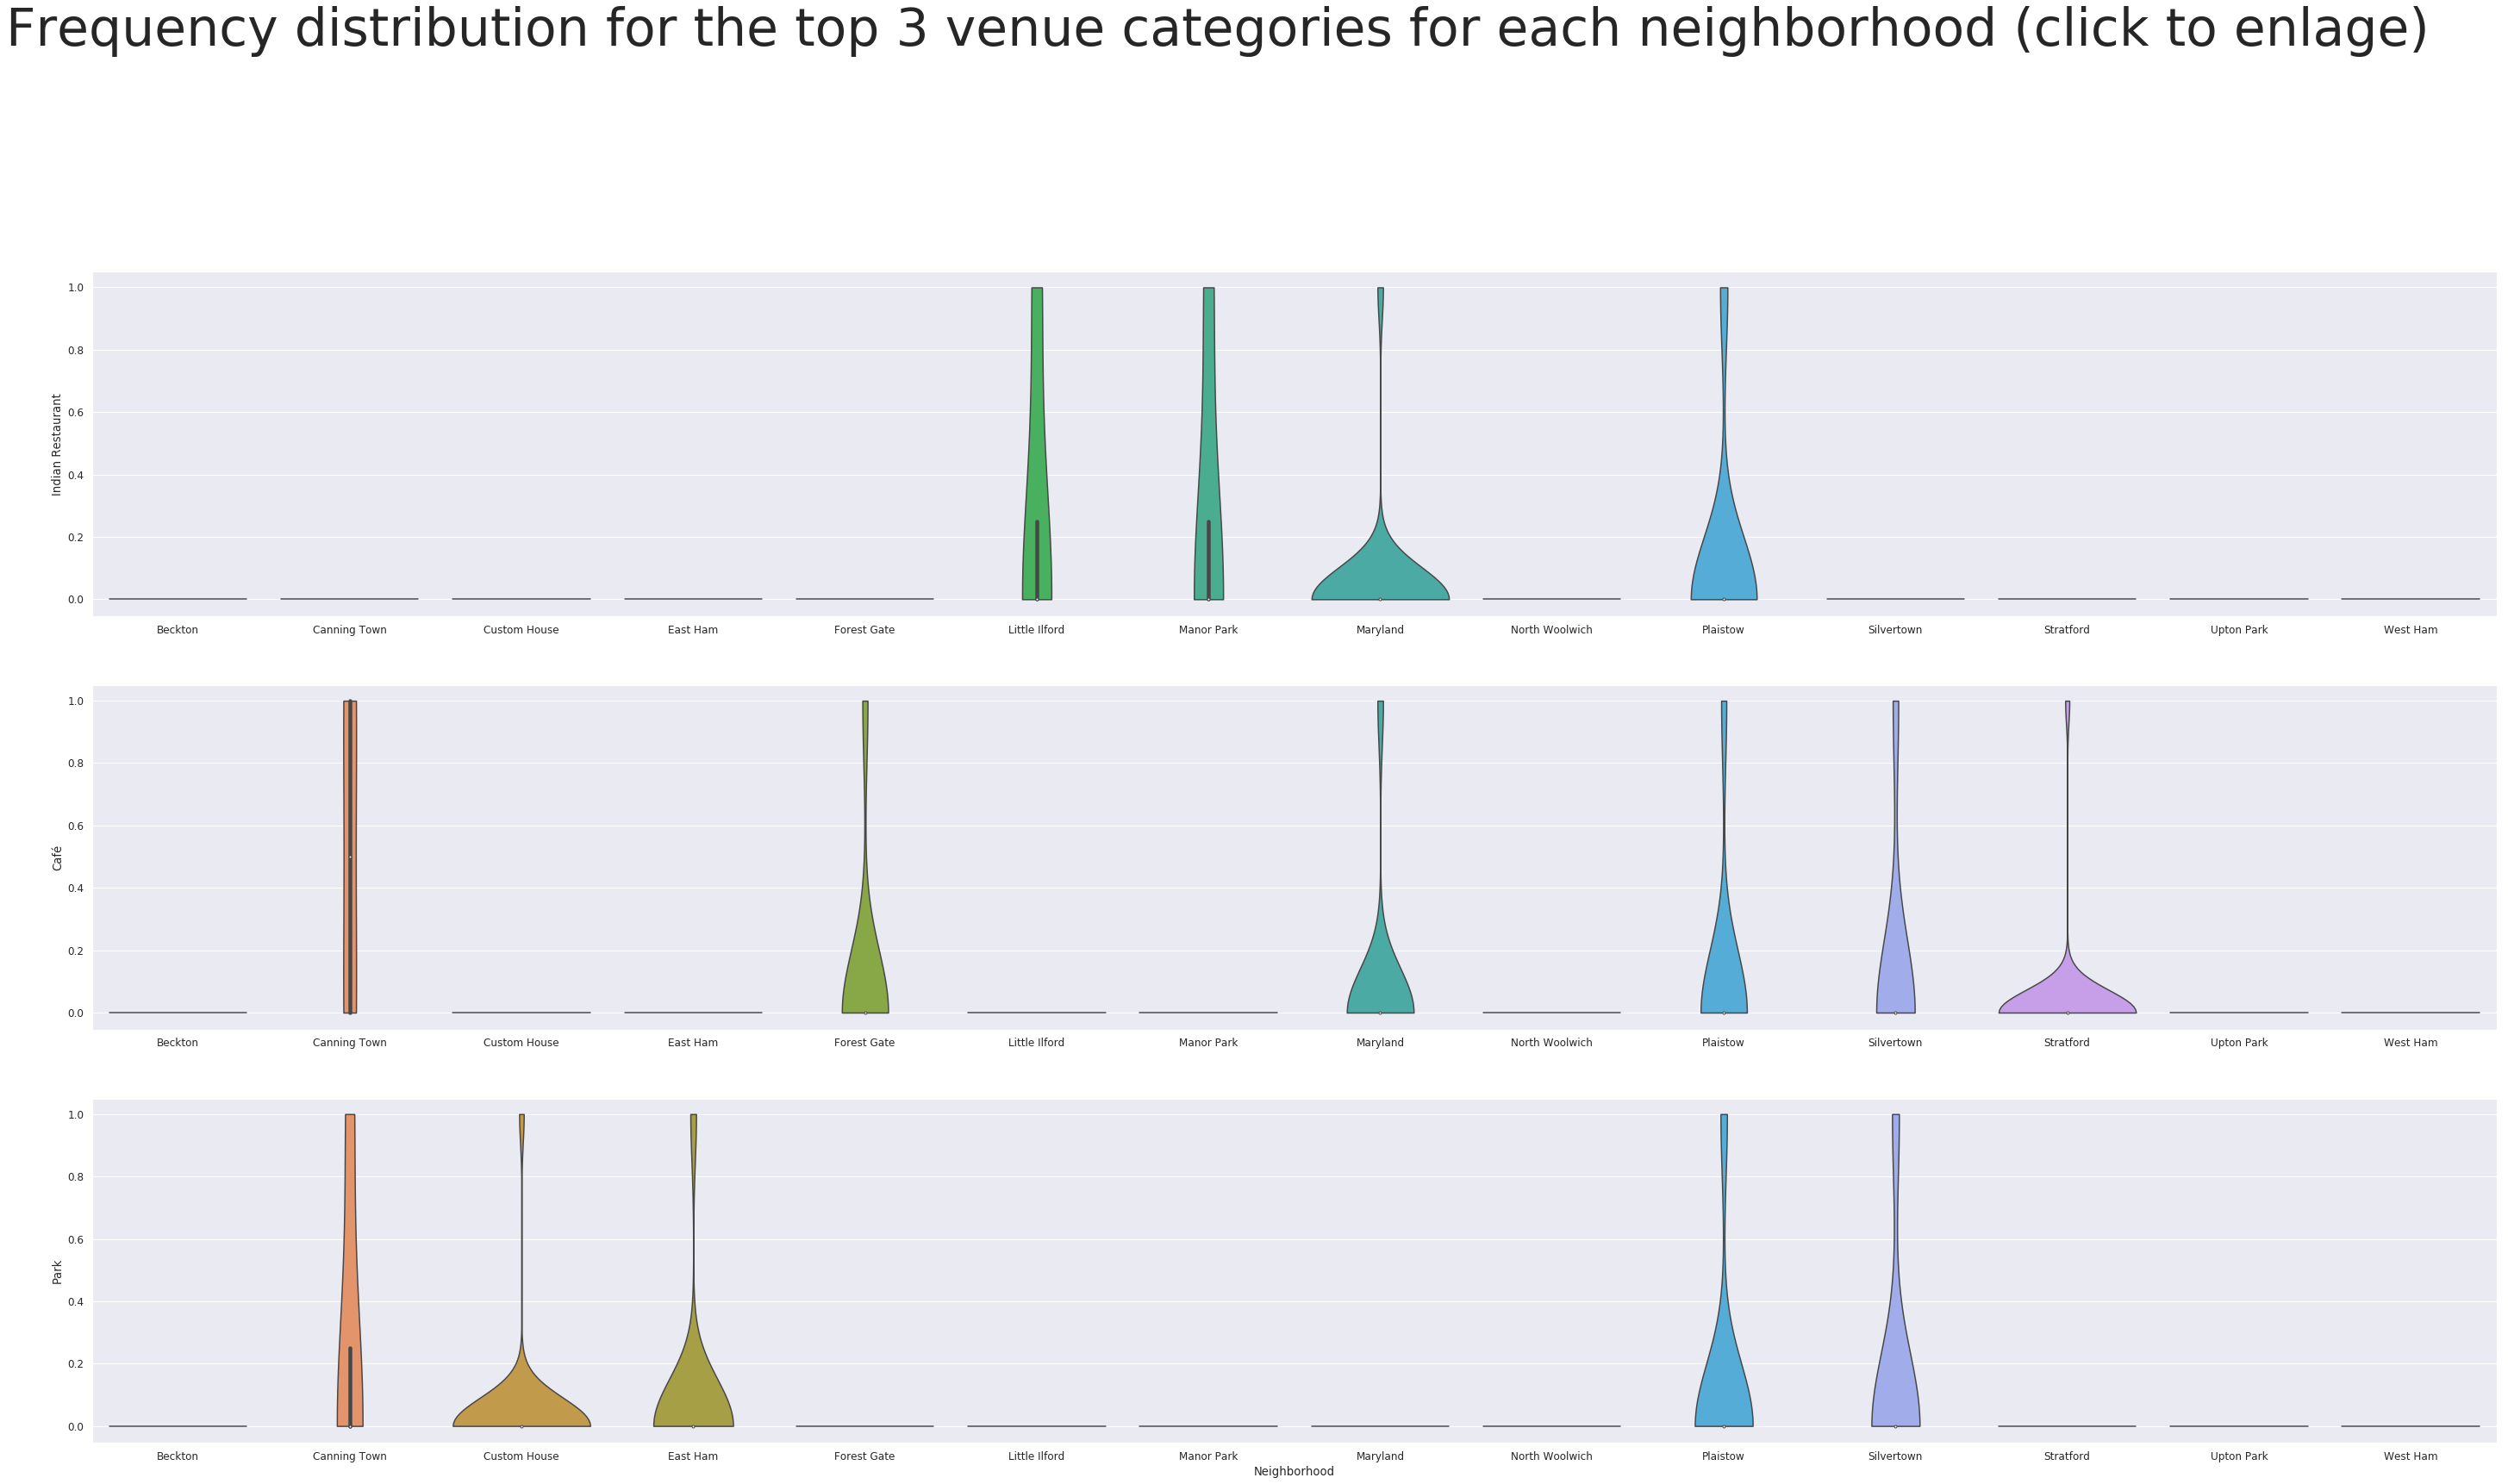

In [65]:
# Categorical plot
# Explore a plot of this data (a violin plot is used which is a density estimation of the underlying distribution).
# The top 3 venue types as specified by the client for each neighborhood are used for the plotting.

import seaborn as sns

fig = plt.figure(figsize=(50,25))
sns.set(font_scale=1.1)

ax = plt.subplot(3,1,1)
sns.violinplot(x="Neighborhood", y="Indian Restaurant", data=Newham_onehot, cut=0);
plt.xlabel("")

ax = plt.subplot(3,1,2)
sns.violinplot(x="Neighborhood", y="Café", data=Newham_onehot, cut=0);
plt.xlabel("")

plt.subplot(3,1,3)
sns.violinplot(x="Neighborhood", y="Park", data=Newham_onehot, cut=0);

ax.text(-1.0, 3.1, 'Frequency distribution for the top 3 venue categories for each neighborhood (click to enlage)', fontsize=60)
plt.savefig ("Distribution_Frequency_Venues_3_categories.png", dpi=240)
plt.show()

### The Neighborhoods
So as we can see from the analysis that the best neighborhood to open new store is **Plaistow** as according to the criteria it has the 3 specified venues in a great frequency (Café, Indian restaurant and Parks).

Other Neighobourhoods which satisfy atleast 2 criteria are:
* Canning Town
* Silvertown
* Maryland


##### getting the best location in new dataframe

In [127]:
chosen_main= Newham_borough.loc[Newham_borough['Neighborhood'] == 'Plaistow']
chosen_main.reset_index(drop = True).head()

,Borough,Neighborhood,Latitude,Longitude
0,Newham,Plaistow,51.523945,0.023828


#### getting the alternative Neighobourhoods which satisfy atleast 2 criteria in another dataframe

In [135]:
nam= ['Canning Town','Silvertown','Maryland']
col = Newham_borough.columns
chosen_alt=pd.DataFrame(columns = col)
chosen_alt

,Borough,Neighborhood,Latitude,Longitude


In [136]:
f=0
for i in nam:
    chosen_alt = chosen_alt.append(Newham_borough.loc[Newham_borough['Neighborhood'] == nam[f]])
    f=f+1
    
chosen_alt.reset_index(drop = True)

,Borough,Neighborhood,Latitude,Longitude
0,Newham,Canning Town,51.514959,0.023429
1,Newham,Silvertown,51.496738,0.037029
2,Newham,Maryland,51.545857,0.004608


## 12.	Displaying selected neighbourhoods of borough on map 
#### The main neighbourhood is in Red
#### The alternative neighbourhoods are in blue
##### Plasitow in Red 
##### Canning Town,Silvertown and Maryland in blue

In [144]:
address = 'Newham, London'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Newham are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Newham are 51.52999955, 0.02931796029382208.


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  app.launch_new_instance()


In [158]:
# create map of Newham using latitude and longitude values
map_Newham1 = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(chosen_alt['Latitude'], chosen_alt['Longitude'], chosen_alt['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=20,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.5).add_to(map_Newham1)  
    
for lat, lng, label in zip(chosen_main['Latitude'], chosen_main['Longitude'], chosen_main['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=20,
        popup=label,
        color='red',
        fill=True,
        fill_color='#e33036',
        fill_opacity=0.5).add_to(map_Newham1)  
    
    
map_Newham1

## Results and Discussion<a name='results'></a>

So as we can see from the analysis the best neighborhood to open new store is **Plaistow** as according to the criteria it has the 3 specified venues in a great frequency (**Café, Indian restaurant** and **Parks**).

Other Neighobourhoods which satisfy atleast 2 criteria are:

* Canning Town
* Silvertown
* Maryland

The prospective neighborhood for new store location where all the 3 criterias are met is **Plaistow** highlighted in **Red** marker in the above map <br><br>
Other neighborhoods which satisfy atleast 2 criteria are **Canning Town, Silvertown** and **Maryland** highlighted in **Blue** marker in the above map

### Conclusions<a name='conclusion'></a>
There are many ways this analysis could have been performed based on different methodolgy and perhaps different data sources. I chose the method I selected as it was a straight forward way to narrow down the options, not complicating what is actually simple in many ways – meeting the the critera for the surrounding venues, and in my case, domain knowledge I have on the subject. I originally intended to use the clustering algorythms to cluster the data, but as it progressed it became obvious that this only complicated the task at hand. The analysis and results are not an end point, but rather a starting point that will guide the next part of the process to find specific store locations. The next part will involve domain knowledge of the industry, and perhaps, of the city itself. But the data analysis and resulting recommendations have greatly narrowed down the best district options based on data and what we can infer from it.

Without leveraging data to make focussed decisions, the process could have been drawn out and resulted in new stores opening in sub-standard areas for this retailer. Data has helped to provide a better strategy and way forward, these data-driven decisions will lead to a better solution in the end.

Thanks for taking part in my Data Science journey!